In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
#from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
#import io
#from google.colab import files
import random

In [2]:
# 读取并处理中债国债收益率曲线数据，由于40及50年期限国债到期收益率从2009年11月30日之前数据缺失，所以分开处理
# 分开后的数据整体完整，去掉NA数据并不影响分析结果
national_debt = pd.read_excel('中债国债收益率曲线.xls', parse_dates=True)
national_debt = national_debt.iloc[1:4664,:]
national_debt_s = national_debt.iloc[:,:national_debt.shape[1]-2].dropna()
national_debt_l = national_debt.iloc[:,national_debt.shape[1]-2:].dropna()

In [3]:
data = national_debt_s.iloc[:,[0,16]]
data.head()

,指标名称,中债国债到期收益率:10年
1,2002-01-04 00:00:00,3.2096
2,2002-01-07 00:00:00,3.2003
3,2002-01-08 00:00:00,3.5225
4,2002-01-09 00:00:00,3.5896
5,2002-01-10 00:00:00,3.5784


In [4]:
from fbprophet import Prophet

In [5]:
data.columns = ['ds', 'y']
data.head()

,ds,y
1,2002-01-04 00:00:00,3.2096
2,2002-01-07 00:00:00,3.2003
3,2002-01-08 00:00:00,3.5225
4,2002-01-09 00:00:00,3.5896
5,2002-01-10 00:00:00,3.5784


In [6]:
import datetime

In [7]:
model = Prophet()#daily_seasonality=True
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
5022,2021-08-27
5023,2021-08-28
5024,2021-08-29
5025,2021-08-30
5026,2021-08-31


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5022,2021-08-27,2.956262,2.151939,3.899569
5023,2021-08-28,2.927593,2.179302,3.807160
5024,2021-08-29,2.925988,2.127836,3.853902
5025,2021-08-30,2.960065,2.124706,3.901387
5026,2021-08-31,2.962001,2.177034,3.825786


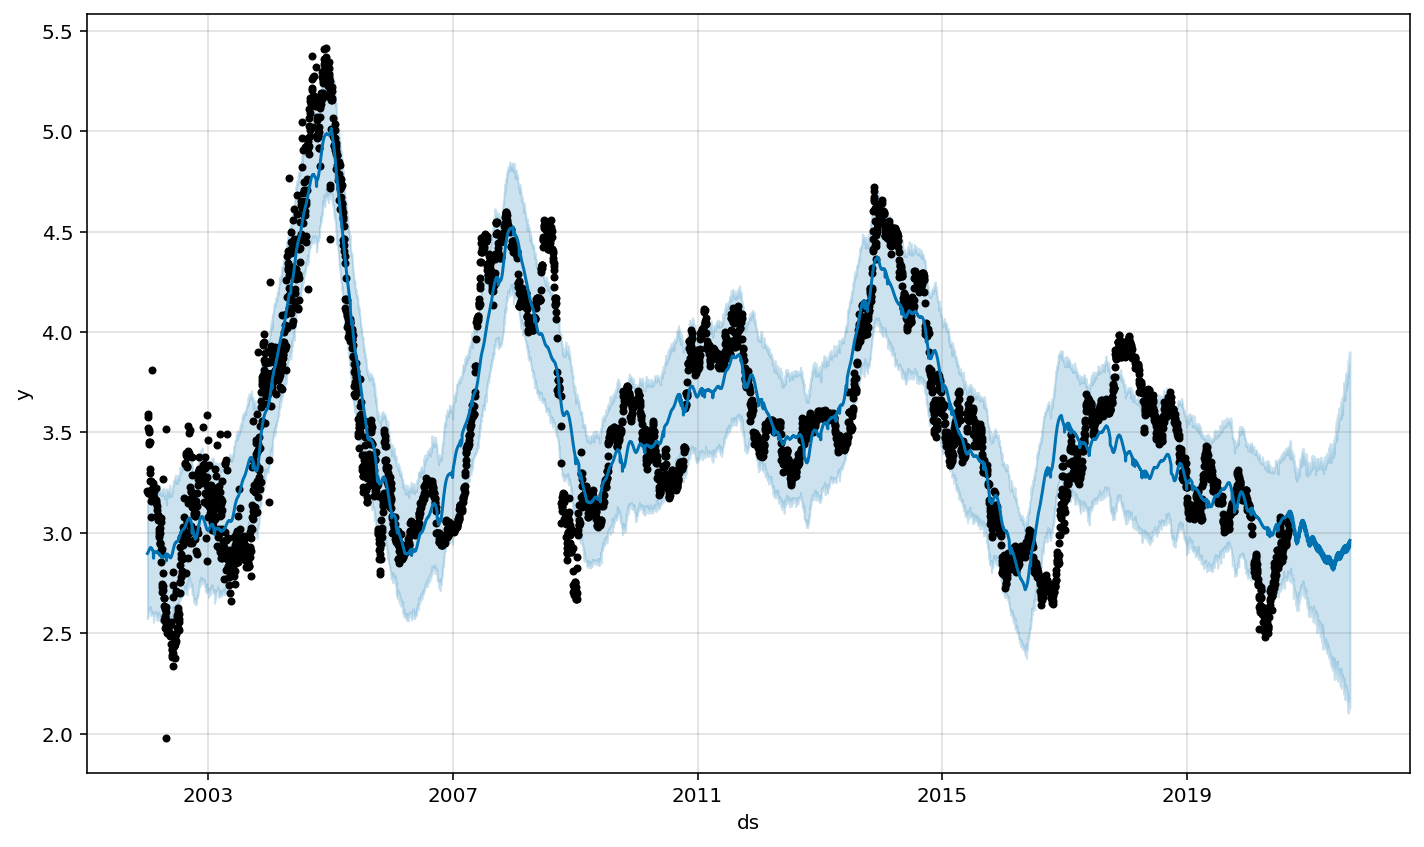

In [10]:
fig1 = model.plot(forecast)

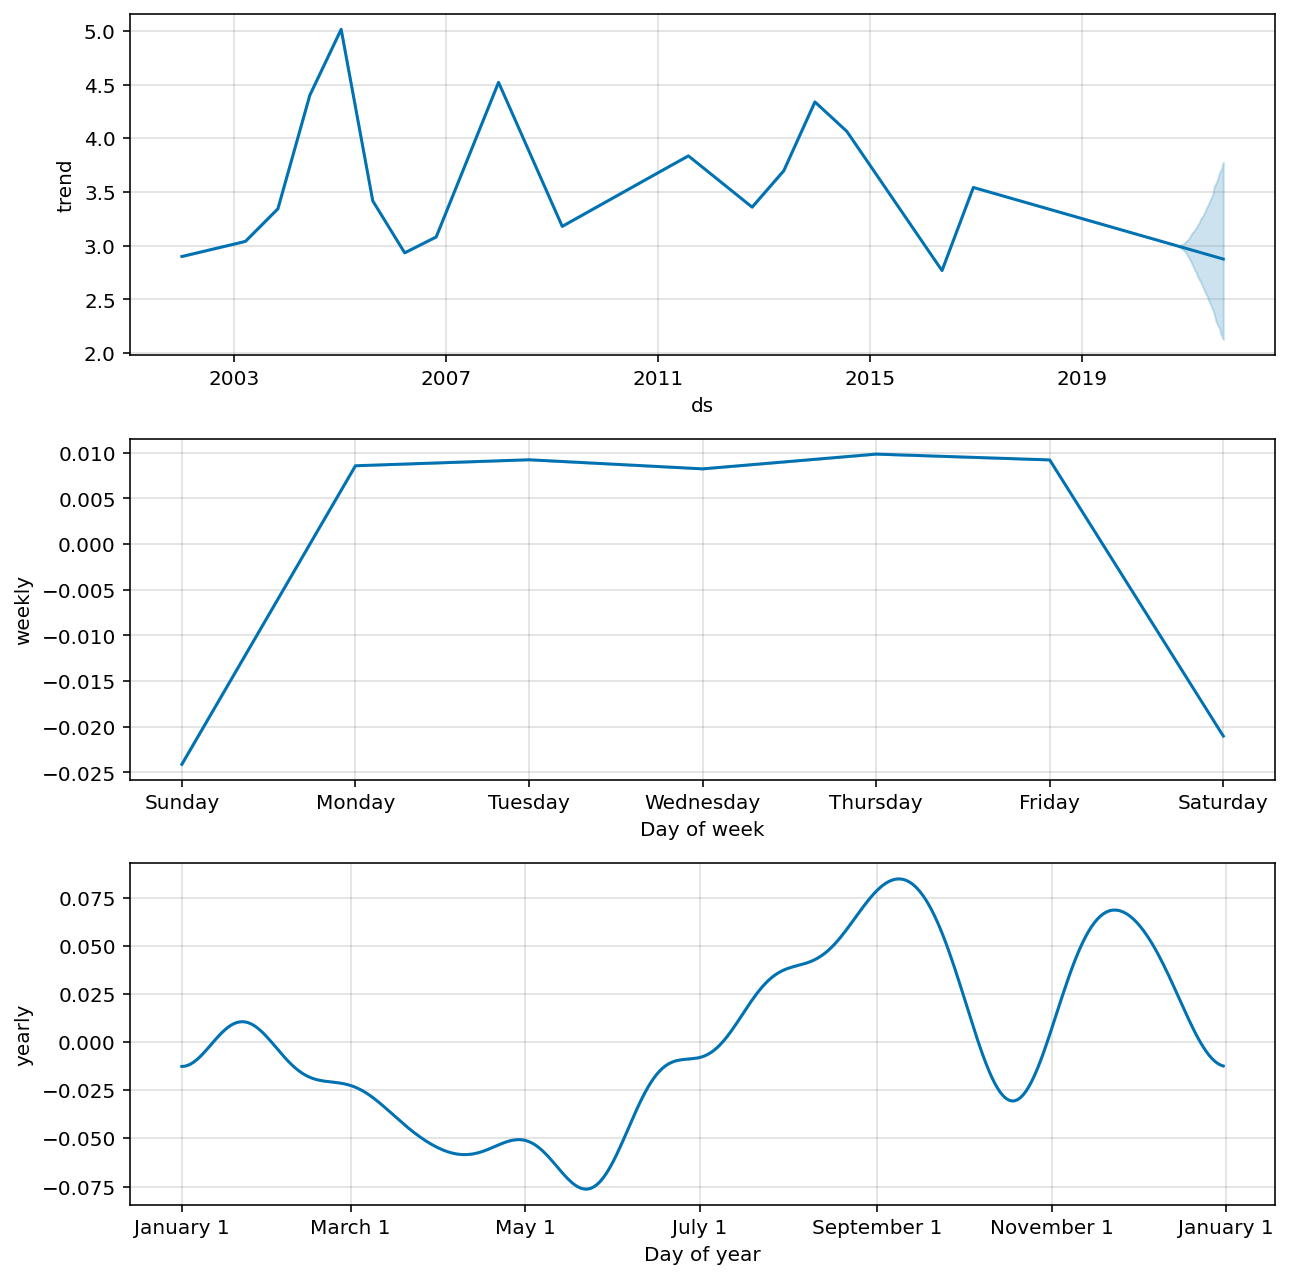

In [11]:
fig2 = model.plot_components(forecast)

In [12]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [13]:
plot_components_plotly(model, forecast)

In [14]:
forecast.yhat

0       2.896952
1       2.900469
2       2.902875
3       2.903756
4       2.907337
          ...   
5022    2.956262
5023    2.927593
5024    2.925988
5025    2.960065
5026    2.962001
Name: yhat, Length: 5027, dtype: float64

In [15]:
data.y

1       3.2096
2       3.2003
3       3.5225
4       3.5896
5       3.5784
         ...  
4659    3.0424
4660    3.0511
4661    3.0599
4662    3.0672
4663    3.0177
Name: y, Length: 4662, dtype: object

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data.y, forecast.yhat[:4662])
mse

0.060305769719516